# Average/Expected Number of Loops

b - a + 1:				 [   1    2    3 ..., 8191 8192 8193]
ceil(log_2(b-a+1)):			 [ 0  1  2 ..., 13 13 14]
2^{ceil(log_2(b-a+1))}:			 [    1     2     4 ...,  8192  8192 16384]
2^{ceil(log_2(b-a+1))} / (b-a+1):	 [ 1.    1.    1.33 ...,  1.    1.    2.  ]


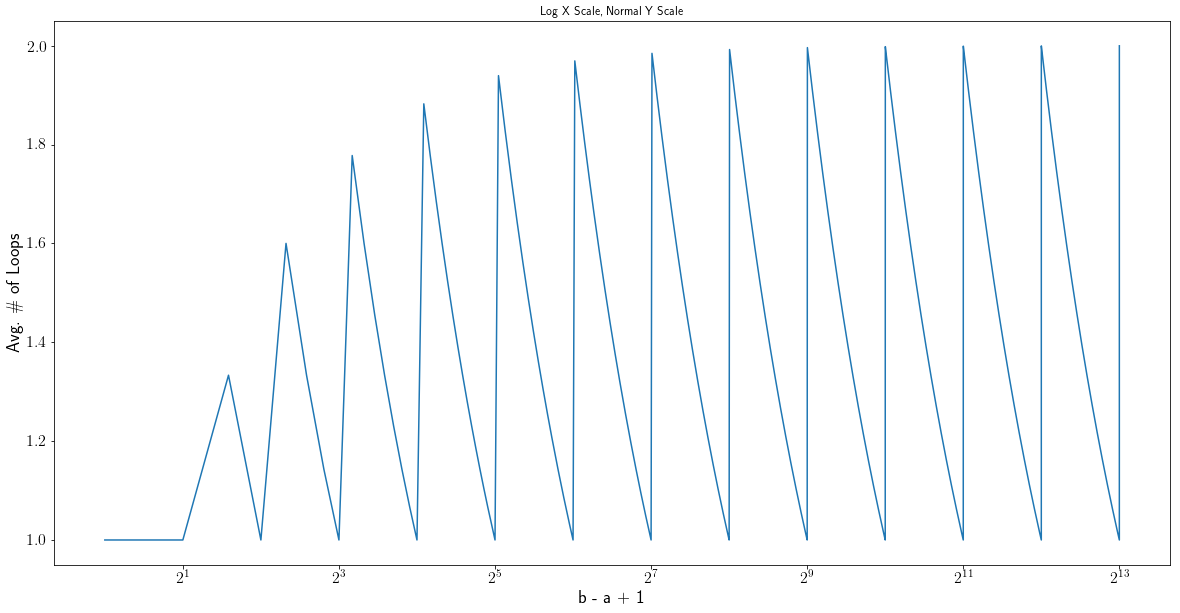

In [68]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

x = np.arange(1, 2**13+2) # [1, 2**13 + 2) == [1, 2**13 + 1] (since we are dealing with ints)
y = np.int_(np.ceil(np.log2(x)))
y2 = 2 ** y

print('b - a + 1:\t\t\t\t', x)
print('ceil(log_2(b-a+1)):\t\t\t', y)
print('2^{ceil(log_2(b-a+1))}:\t\t\t', y2)
print('2^{ceil(log_2(b-a+1))} / (b-a+1):\t', np.round(y2/x, decimals=2))

plt.figure(figsize=(20,10)); plt.title('Log X Scale, Normal Y Scale')
plt.xlabel('b - a + 1', fontsize=18);plt.ylabel(r'Avg. \# of Loops', fontsize=18)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
plt.semilogx(x, y2/x, basex=2);plt.show()

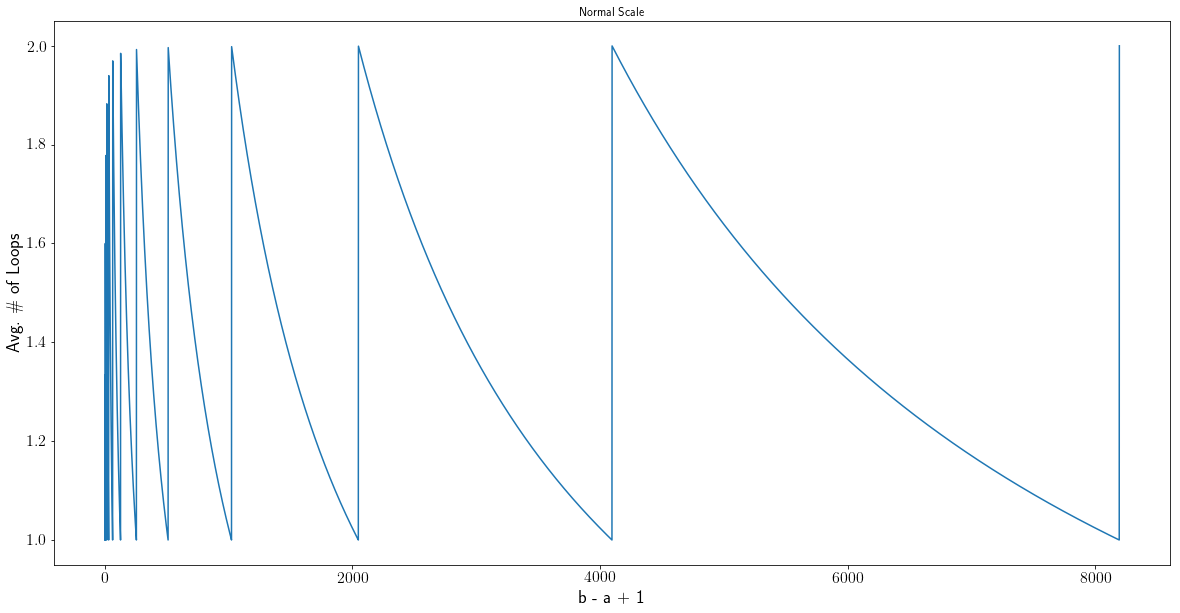

In [69]:
plt.figure(figsize=(20,10)); plt.title('Normal Scale')
plt.xlabel('b - a + 1', fontsize=18);plt.ylabel(r'Avg. \# of Loops', fontsize=18)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
plt.plot(x, y2/x);plt.show()

## Visualizing the Relationship

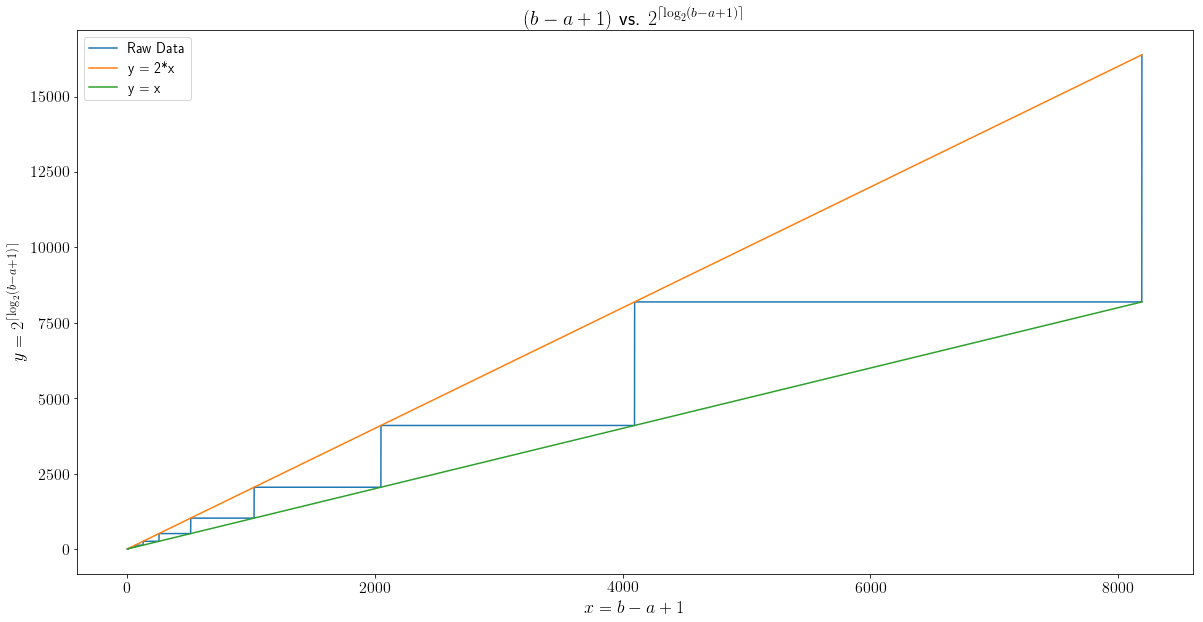

In [70]:
plt.figure(figsize=(20,10)); plt.title(r'$(b - a + 1)$ vs. $2^{\lceil \log_2(b - a + 1) \rceil}$',fontsize=20)
plt.xlabel('$x = b - a + 1$', fontsize=18);plt.ylabel(r'$y = 2^{\lceil \log_{2}(b - a + 1) \rceil}$', fontsize=18)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
plt.plot(x, y2, label='Raw Data');
plt.plot([x[0], x[-1]], [2*x[0], 2*x[-1]], label='y = 2*x')
plt.plot([x[0], x[-1]], [x[0], x[-1]], label='y = x')
plt.legend(fontsize=14)
plt.show()

# Fair 6 Sided Die

b - a + 1:				 [   1    2    3 ..., 8191 8192 8193]
ceil(log_6(b-a+1)):			 [0 1 1 ..., 6 6 6]
6^{ceil(log_6(b-a+1))}:			 [    1     6     6 ..., 46656 46656 46656]
6^{ceil(log_6(b-a+1))} / (b-a+1):	 [ 1.    3.    2.   ...,  5.7   5.7   5.69]


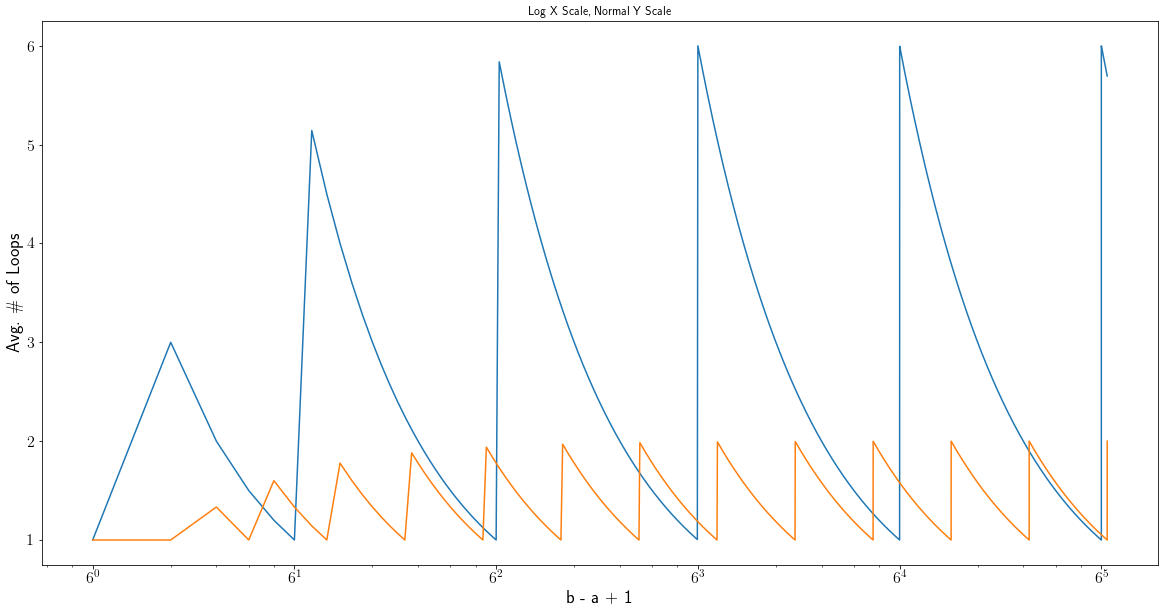

In [71]:
x = np.arange(1, 2**13+2) # [1, 2**13 + 2) == [1, 2**13 + 1] (since we are dealing with ints)
y = np.int_(np.ceil(np.log(x)/np.log(6)))
y6 = 6 ** y

print('b - a + 1:\t\t\t\t', x)
print('ceil(log_6(b-a+1)):\t\t\t', y)
print('6^{ceil(log_6(b-a+1))}:\t\t\t', y6)
print('6^{ceil(log_6(b-a+1))} / (b-a+1):\t', np.round(y6/x, decimals=2))

plt.figure(figsize=(20,10)); plt.title('Log X Scale, Normal Y Scale')
plt.xlabel('b - a + 1', fontsize=18);plt.ylabel(r'Avg. \# of Loops', fontsize=18)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
plt.semilogx(x, y6/x, basex=6, label=r'$6^{ceil(log_6(b-a+1))} / (b-a+1)$')
plt.semilogx(x, y2/x, basex=6, label=r'$2^{ceil(log_2(b-a+1))} / (b-a+1)$');plt.show()

## Worst Expected Case

The worst Expected Case assumes that the value for $x$ produces the worst expected number of iterations of the while loop. This is easily calculated as the number of sides to the fair die/coin.

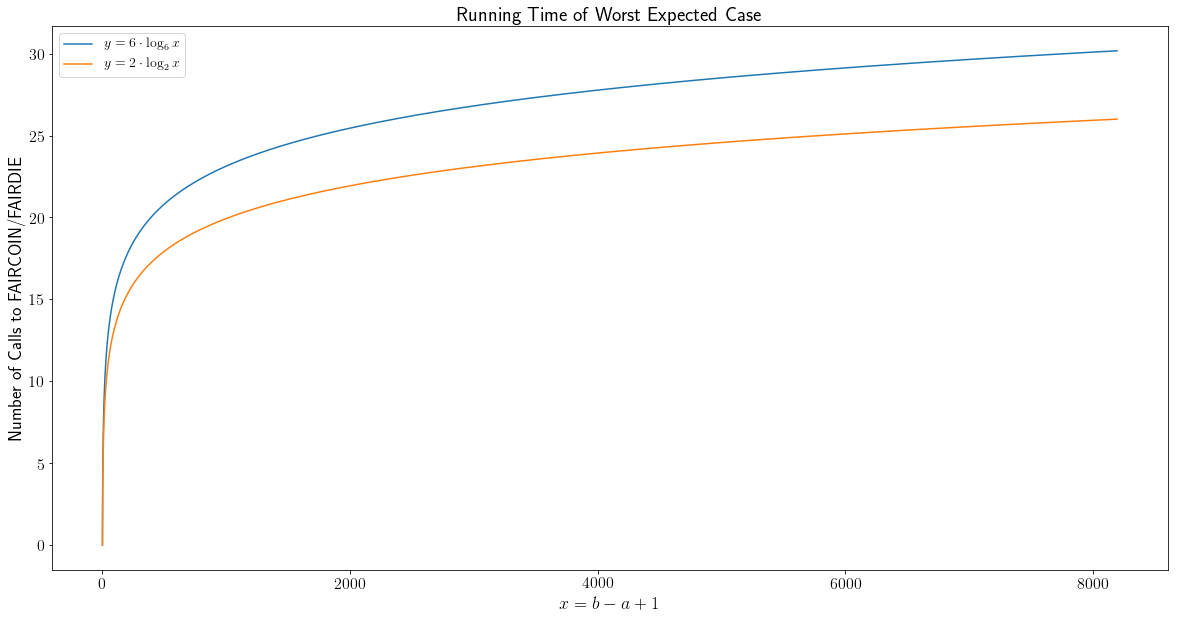

In [72]:
plt.figure(figsize=(20,10)); plt.title(r'Running Time of Worst Expected Case',fontsize=20)
plt.xlabel('$x = b - a + 1$', fontsize=18);plt.ylabel(r'Number of Calls to FAIRCOIN/FAIRDIE', fontsize=18)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
plt.plot(x, 6 * np.log(x)/np.log(6), label=r'$y = 6 \cdot\log_6{x}$')
plt.plot(x, 2 * np.log(x)/np.log(2), label=r'$y = 2 \cdot\log_2{x}$')
plt.legend(fontsize=14)
plt.show()

## Running Time for 2 and 6 sided die

If we know the range of expected iterations of the while loop, we can take an average of that value to see what the average expected number of iterations is given a random value for $b - a +1$.

large_x: [   10    11    12 ...,  9997  9998 10000]


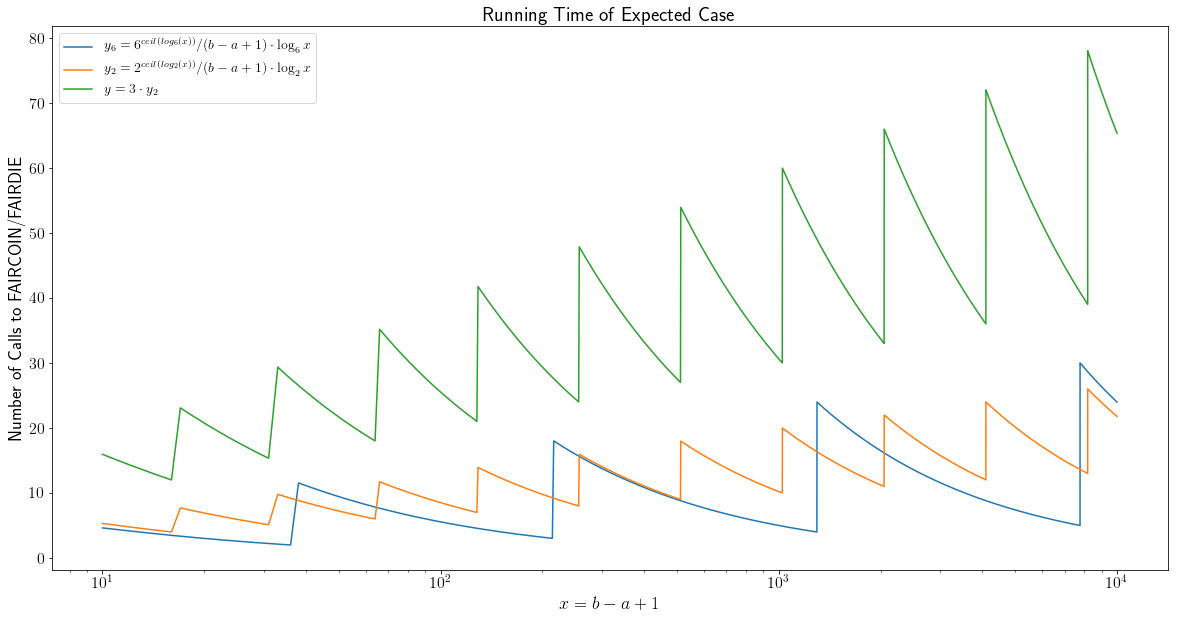

In [73]:
large_x = np.int_(np.linspace(10, 10**4, len(y2)))

y2 = np.int_(np.ceil(np.log(large_x)/np.log(2)))
y2 = 2 ** y2

y6 = np.int_(np.ceil(np.log(large_x)/np.log(6)))
y6 = 6 ** y6

print('large_x:', large_x)

plt.figure(figsize=(20,10)); plt.title(r'Running Time of Expected Case',fontsize=20)
plt.xlabel('$x = b - a + 1$', fontsize=18);plt.ylabel(r'Number of Calls to FAIRCOIN/FAIRDIE', fontsize=18)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
plt.semilogx(large_x, y6/large_x * np.log(large_x)/np.log(6), basex=10, label=r'$y_6 = 6^{ceil(log_6(x))} / (b-a+1) \cdot\log_6{x}$')
plt.semilogx(large_x, y2/large_x * np.log(large_x)/np.log(2), basex=10, label=r'$y_2 = 2^{ceil(log_2(x))} / (b-a+1) \cdot\log_2{x}$')
plt.semilogx(large_x, 3 * y2/large_x * np.log(large_x)/np.log(2), basex=10, label=r'$y = 3 \cdot y_2$')
plt.legend(fontsize=14)
plt.show()

Same Big-O

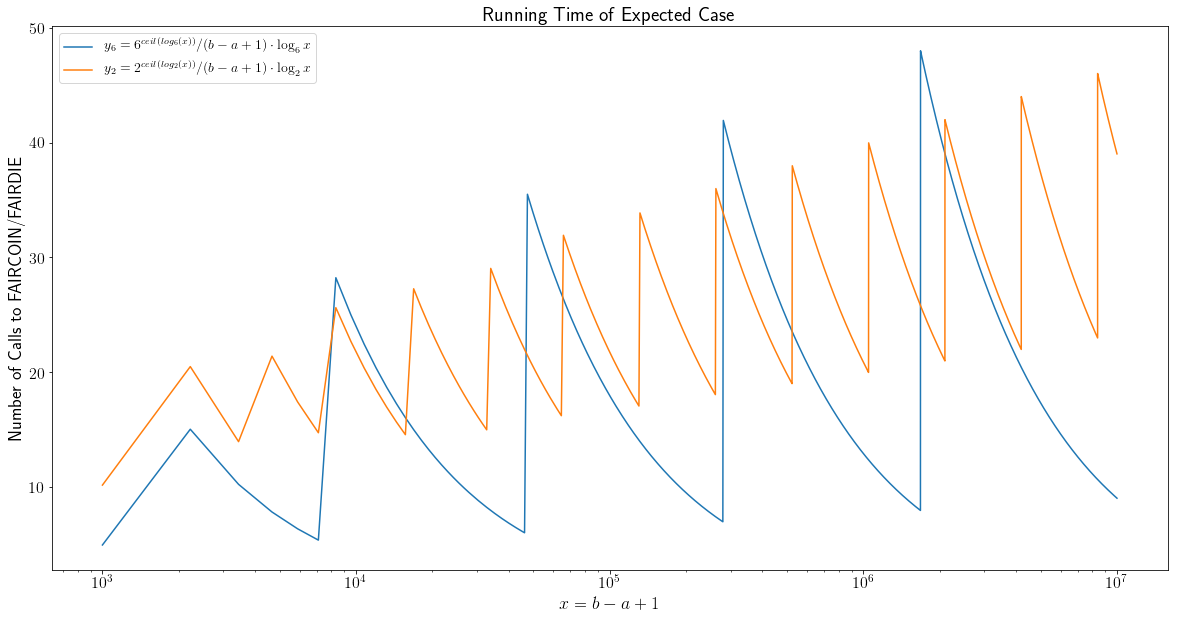

In [74]:
lx = np.int_(np.linspace(1000, 10**7, len(y2)))

y2 = np.int_(np.ceil(np.log(lx)/np.log(2)))
y2 = 2 ** y2

y6 = np.int_(np.ceil(np.log(lx)/np.log(6)))
y6 = 6 ** y6

plt.figure(figsize=(20,10)); plt.title(r'Running Time of Expected Case',fontsize=20)
plt.xlabel('$x = b - a + 1$', fontsize=18);plt.ylabel(r'Number of Calls to FAIRCOIN/FAIRDIE', fontsize=18)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
plt.semilogx(lx, y6/lx * np.log(lx)/np.log(6), basex=10, label=r'$y_6 = 6^{ceil(log_6(x))} / (b-a+1) \cdot\log_6{x}$')
plt.semilogx(lx, y2/lx * np.log(lx)/np.log(2), basex=10, label=r'$y_2 = 2^{ceil(log_2(x))} / (b-a+1) \cdot\log_2{x}$')
#plt.semilogx(lx, 3 * y2/lx * np.log(lx)/np.log(2), basex=10, label=r'$y = 3 \cdot y_2$')
#plt.semilogx(lx, 7 * y6/lx * np.log(lx)/np.log(6), basex=10, label=r'$y = 7 \cdot y_6$')
plt.legend(fontsize=14)
plt.show()

An easier way to visualize. If we observe, $6^{ceil(log_6(x))} / (b-a+1)$ is a periodic function that ranges from $[1,6]$ and $6^{ceil(log_6(x))} / (b-a+1)$ is a periodic function that ranges from $[1,2]$. Thus we can use the max and minimum values to observe the range and thus can pick a 2 $c$'s to ensure that both function can always be greater than the other for a large value of $x$ (we will pick $x = 1000$).

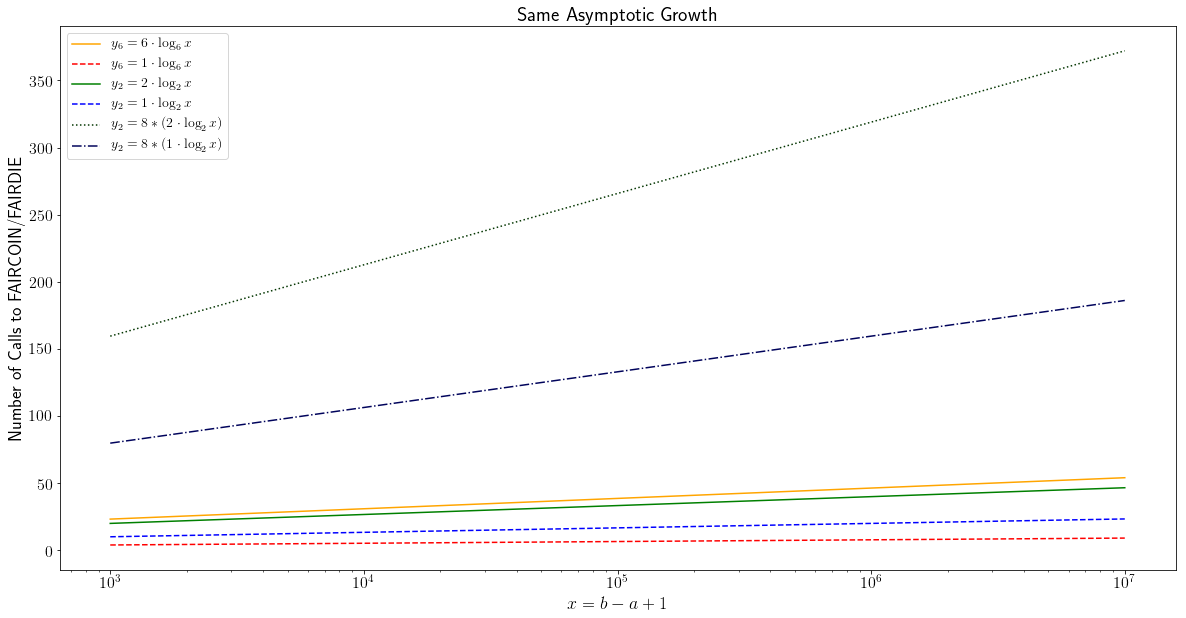

In [95]:
lx = np.int_(np.linspace(1000, 10**7, len(y2)))

plt.figure(figsize=(20,10)); plt.title(r'Same Asymptotic Growth',fontsize=20)
plt.xlabel('$x = b - a + 1$', fontsize=18);plt.ylabel(r'Number of Calls to FAIRCOIN/FAIRDIE', fontsize=18)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)

plt.semilogx(lx, 6 * np.log(lx)/np.log(6), 'orange', label=r'$y_6 = 6 \cdot\log_6{x}$')
plt.semilogx(lx, 1 * np.log(lx)/np.log(6), '--r', label=r'$y_6 = 1 \cdot\log_6{x}$')

plt.semilogx(lx, 2 * np.log(lx)/np.log(2), 'green', label=r'$y_2 = 2 \cdot\log_2{x}$')
plt.semilogx(lx, 1 * np.log(lx)/np.log(2), '--b', label=r'$y_2 = 1 \cdot\log_2{x}$')

plt.semilogx(lx, 8*2 * np.log(lx)/np.log(2), color='xkcd:dark green', linestyle='dotted', label=r'$y_2 = 8 * (2 \cdot\log_2{x})$')
plt.semilogx(lx, 8*1 * np.log(lx)/np.log(2), color='xkcd:dark blue', linestyle='dashdot', label=r'$y_2 = 8 * (1 \cdot\log_2{x})$')

plt.legend(fontsize=14)
plt.show()